# **Project Name**    - Unemployment Analysis with Python

# **Problem Statement**

Unemployment is a major economic indicator, reflecting the share of people in the labor force who are jobless and actively looking for work. The COVID-19 pandemic caused major shifts in labor markets worldwide, resulting in rising unemployment. Analyzing these changes through data can help uncover key patterns and causes.

**Objective:**

The goal of this project is to examine unemployment trends using Python, with a special focus on the period affected by COVID-19. It aims to identify contributing factors, explore data relationships, and provide clear, actionable insights.

**Key Areas:**

- Study the unemployment rate as a measure of labor market health

- Assess the impact of COVID-19 on employment trends

- Using Python for data analysis and visualizations

- Present data-backed recommendations for policy and recovery

This work supports better understanding of labor challenges and can assist in shaping effective economic responses.

# Importing the Dependencies

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import datetime as dt

# Data Collection and processing

In [147]:
# Load Dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/utkarshranjan01/Unemployment-Analysis/refs/heads/main/Unemployment%20in%20India.csv")

In [148]:
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [149]:
dataset.shape

(768, 7)

In [150]:
# statistical measure
dataset.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [151]:
dataset.dtypes

,0
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


In [152]:
# Finding out information about the dataset using info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [153]:
dataset.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [154]:
# Duplicate value count in the dataset
dup = dataset.duplicated().sum()
print('The number of duplicated rows are',dup)

The number of duplicated rows are 27


<Axes: >

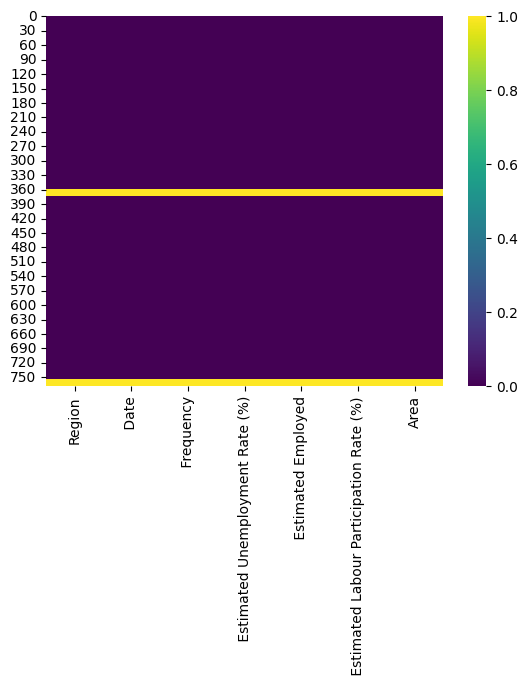

In [155]:
# Checking Null Value by Plotting Heatmap
sns.heatmap(dataset.isnull(), cmap='viridis')

In [156]:
# This is to get the index of rows with NaN
rows_with_nan_index = dataset[dataset.isnull().any(axis=1)].index
print(f"Row indices with NaN: {rows_with_nan_index.tolist()}")

Row indices with NaN: [359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767]


# What do we know about the dataset?
- The Unemployment dataset consists of Region, Date, Unemployment Rate etc. for Indian states.
- There are 768 rows and 7 columns provided in the data.
- 27 duplicate rows present in the dataset.
- 28 Null values present in each of the columns in the given dataset.

# Understanding the variables

In [157]:
# Dataset Columns
dataset.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Checking to know about the unique values of each column

In [158]:
for i in dataset.columns.tolist():
    print("The number of unique values in", i, ':', dataset[i].nunique())

The number of unique values in Region : 28
The number of unique values in  Date : 14
The number of unique values in  Frequency : 2
The number of unique values in  Estimated Unemployment Rate (%) : 624
The number of unique values in  Estimated Employed : 740
The number of unique values in  Estimated Labour Participation Rate (%) : 626
The number of unique values in Area : 2


# Data Wrangling

In [159]:
dataset.columns.tolist()

['Region',
 ' Date',
 ' Frequency',
 ' Estimated Unemployment Rate (%)',
 ' Estimated Employed',
 ' Estimated Labour Participation Rate (%)',
 'Area']

In [160]:
# Rename the columns of the DataFrame
dataset.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

In [161]:
# Convert the 'Frequency' and 'Region' column to a categorical data type which is more efficient

dataset['Frequency'] = dataset['Frequency'].astype('category')
dataset['Region'] = dataset['Region'].astype('category')

In [162]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
dataset['Month'] = dataset['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
dataset['Month_int'] = dataset['Month'].fillna(0).astype(int)  # Fill NaN with 0 as that will be simpler filling up Nan with 0

In [163]:
# Drop the 'Month' column from the DataFrame as we already have the months integer
dataset.drop(columns='Month', inplace=True)

# Making a new DataFrame for the lockdown period

In [164]:
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = dataset.copy()

In [165]:
# Drop all the missing values from the dataset
dataset=dataset.dropna()

In [166]:
# Define a date range mask to filter rows where the Date falls within the range of before lockdown period
mask = (dataset['Date'] >= '2019-05-31') & (dataset['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
dataset = dataset.loc[mask]

In [167]:
# Define a date range of during the lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]

# Data Preprocessing and Insights
Several preprocessing steps were applied to prepare the dataset for analysis and extract meaningful insights:

- Column Renaming: All columns in the DataFrame were renamed to ensure clarity and consistency.

- Data Type Optimization: The Frequency and Region columns were converted to categorical types to enhance memory efficiency and improve analysis performance.

- Date Conversion and Feature Engineering: The Date column was transformed into datetime format. A new column named Month_int was created by extracting the month from the Date and converting it into an integer for easier temporal analysis.

- Column Removal: The original Month column was removed after extracting the necessary information to avoid redundancy.

- Dataset Segmentation: A separate copy of the dataset was created to isolate data from the lockdown period.

- Missing Data Handling: Rows with missing values were removed from the dataset corresponding to the period before the lockdown to ensure data quality.

- Time Frame Definition: The period from May 31, 2019 to March 31, 2020 was defined as the pre-lockdown phase, and dates after April 30, 2020 were treated as the lockdown phase for the purpose of comparative analysis.

# Data Visualization with Charts

## Chart - 1 : Region Wise is Estimated with the Unemployment Rate

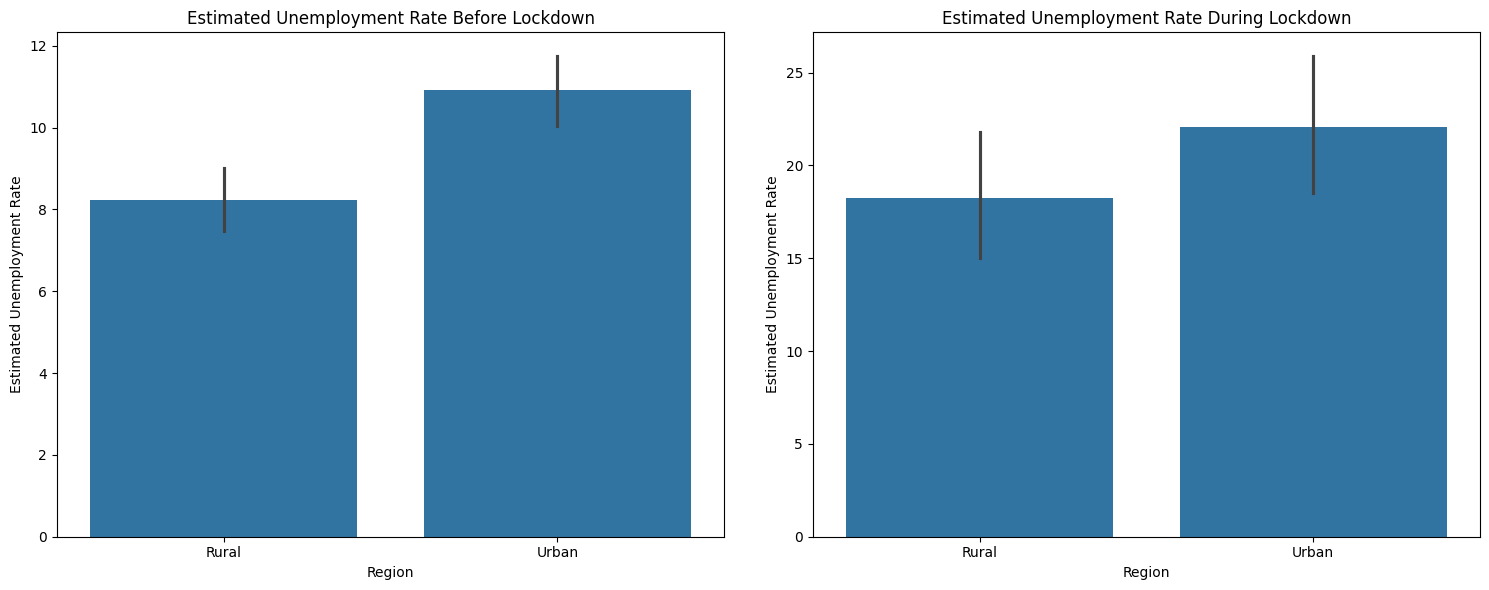

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=dataset, ax = axes[0])

# Set labels and title for the first subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
axes[0].set_title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld, ax = axes[1])

# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
axes[1].set_title('Estimated Unemployment Rate During Lockdown', fontsize=12)

plt.tight_layout(w_pad=3, h_pad=3)
plt.show()

From the above charts we can say that the Estimated Unemployment Rate are much higher during the lockdown time compare to the before lockdown.

# Chart - 2 : Bar Plot for State Wise Estimated Unemployment Rate

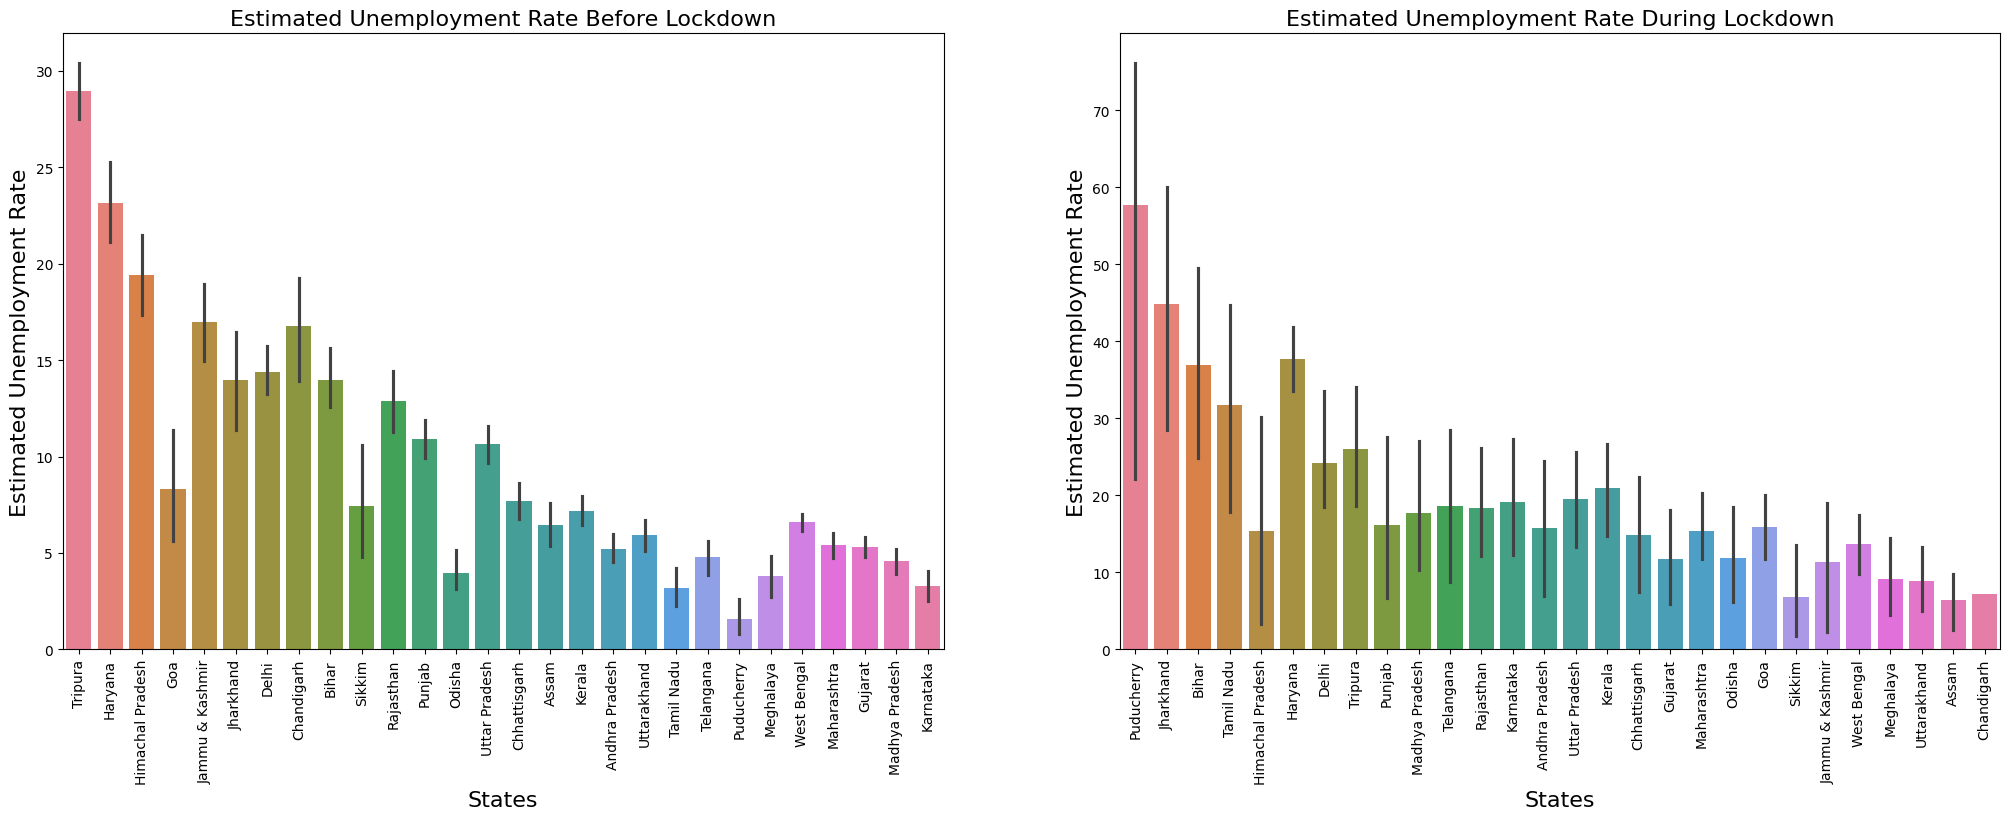

In [188]:
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=dataset.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate", hue="States")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate", hue="States")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

Before lockdown: Tripura, Haryana, and Himachal Pradesh had the highest estimated unemployment rates.
During lockdown: Puducherry, Jharkhand, and Bihar emerged as the states with the highest estimated unemployment rates.
This shift demonstrates how lockdown measures affected different regions differently, with some states experiencing dramatic increases while others saw varying impacts based on their economic structures and local conditions.

# Chart - 3 : State Wise Estimated Employed Workforce

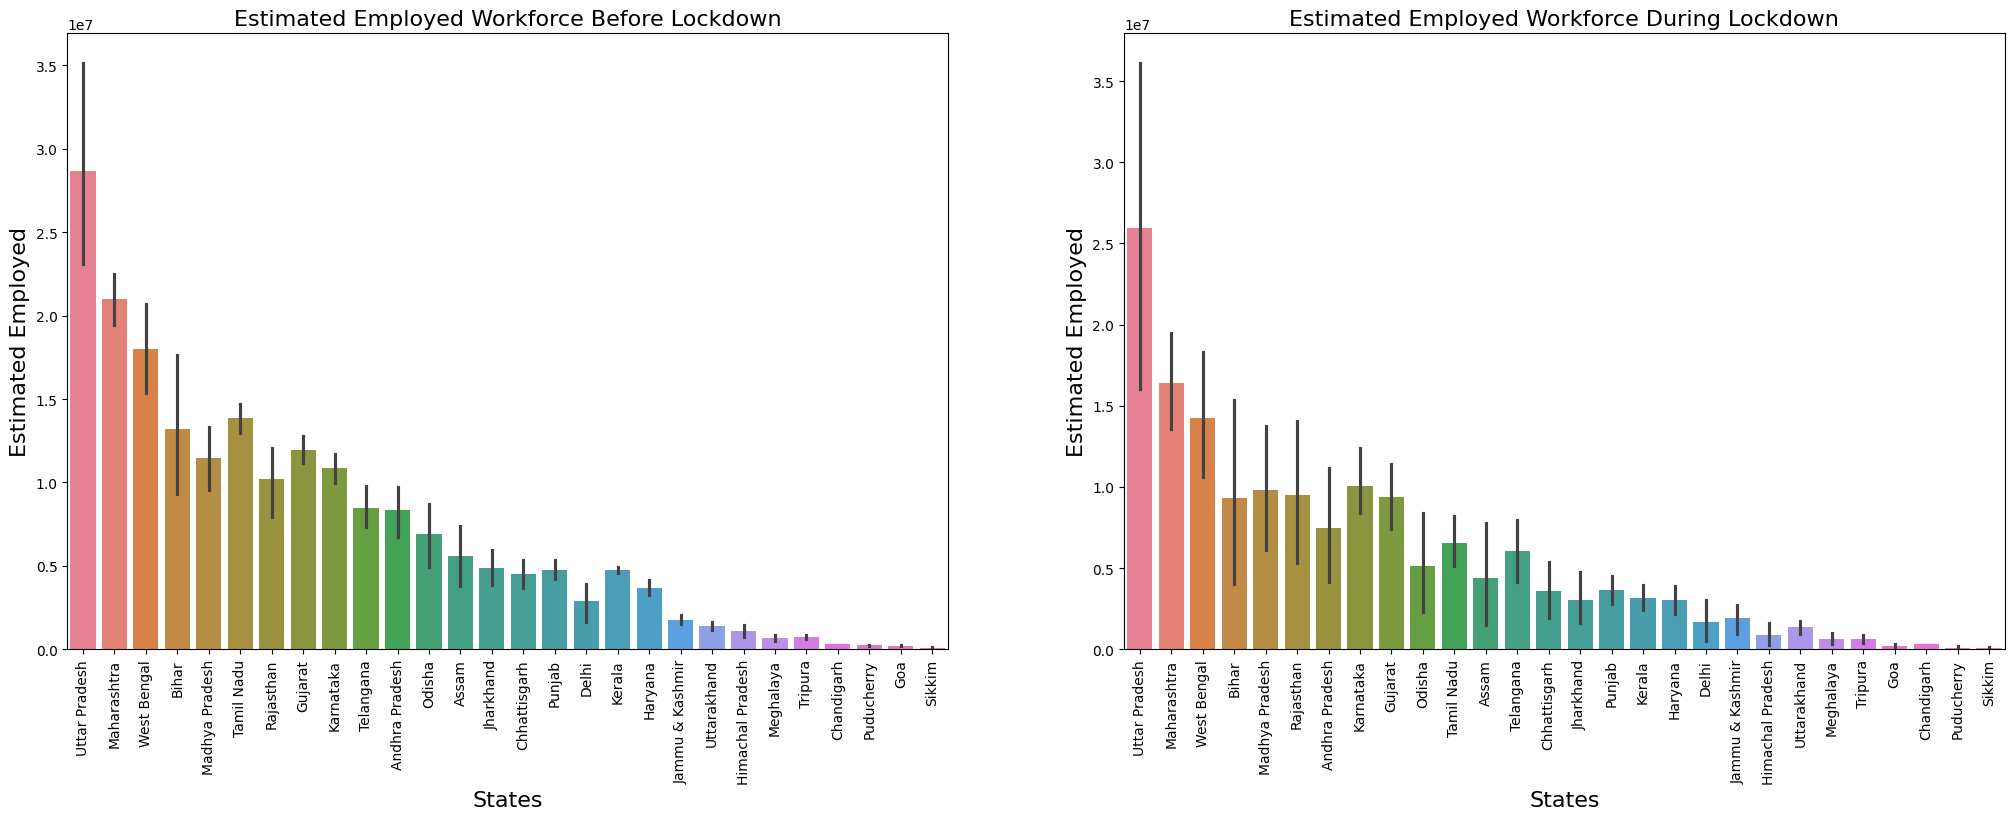

In [191]:
# Chart - 4 Bar plot visualization code for state wise Estimated Employed Workforce

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data=dataset.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed", hue = "States")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed", hue = "States")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()

Based on the charts, employment patterns showed greater consistency compared to unemployment trends:
Before lockdown: Uttar Pradesh, Maharashtra, and West Bengal led in estimated employed workforce numbers.
During lockdown: These same three states - Uttar Pradesh, Maharashtra, and West Bengal - maintained their positions as the top states for estimated employed workforce.
This consistency suggests that despite the economic disruptions caused by lockdown measures, these states retained their status as major employment centers, likely due to their large populations and diverse economic bases.

# Chart - 4 : State Wise Estimated Labour Participation Rate

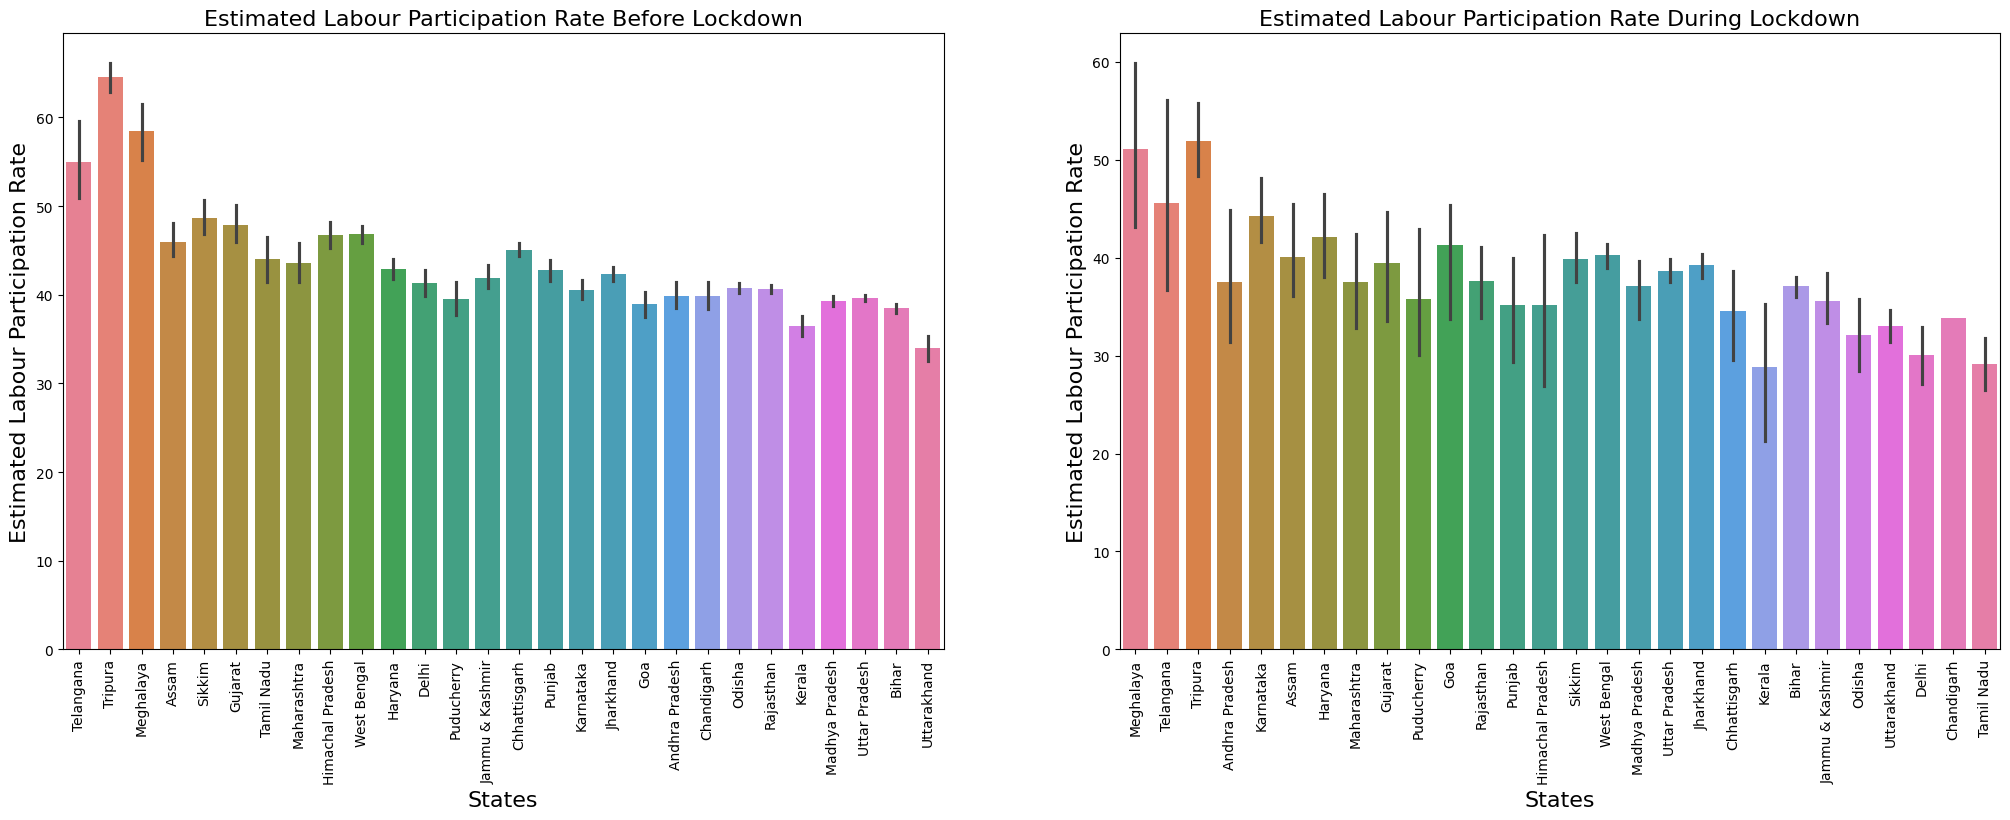

In [194]:
# Chart - 5 Bar plot visualization code for state wise Estimated Labour Participation Rate

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=dataset.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate", hue = "States")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate", hue = "States")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

Based on the charts, labor participation rates showed some regional shifts between periods:

Before lockdown: Telangana, Tripura, Meghalaya, and Assam recorded the highest estimated labor participation rates.

During lockdown: The top positions were held by Meghalaya, Telangana, Tripura, and Andhra Pradesh for estimated labor participation rates.

This indicates that while some states like Telangana, Tripura, and Meghalaya maintained consistently high labor participation throughout both periods, there were changes with Assam dropping from the top tier and Andhra Pradesh emerging among the leaders during the lockdown phase.






# Chart - 5 : Correlation Heatmap

In [196]:
# Create new DataFrames
df1_stats = dataset[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

df2_stats = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

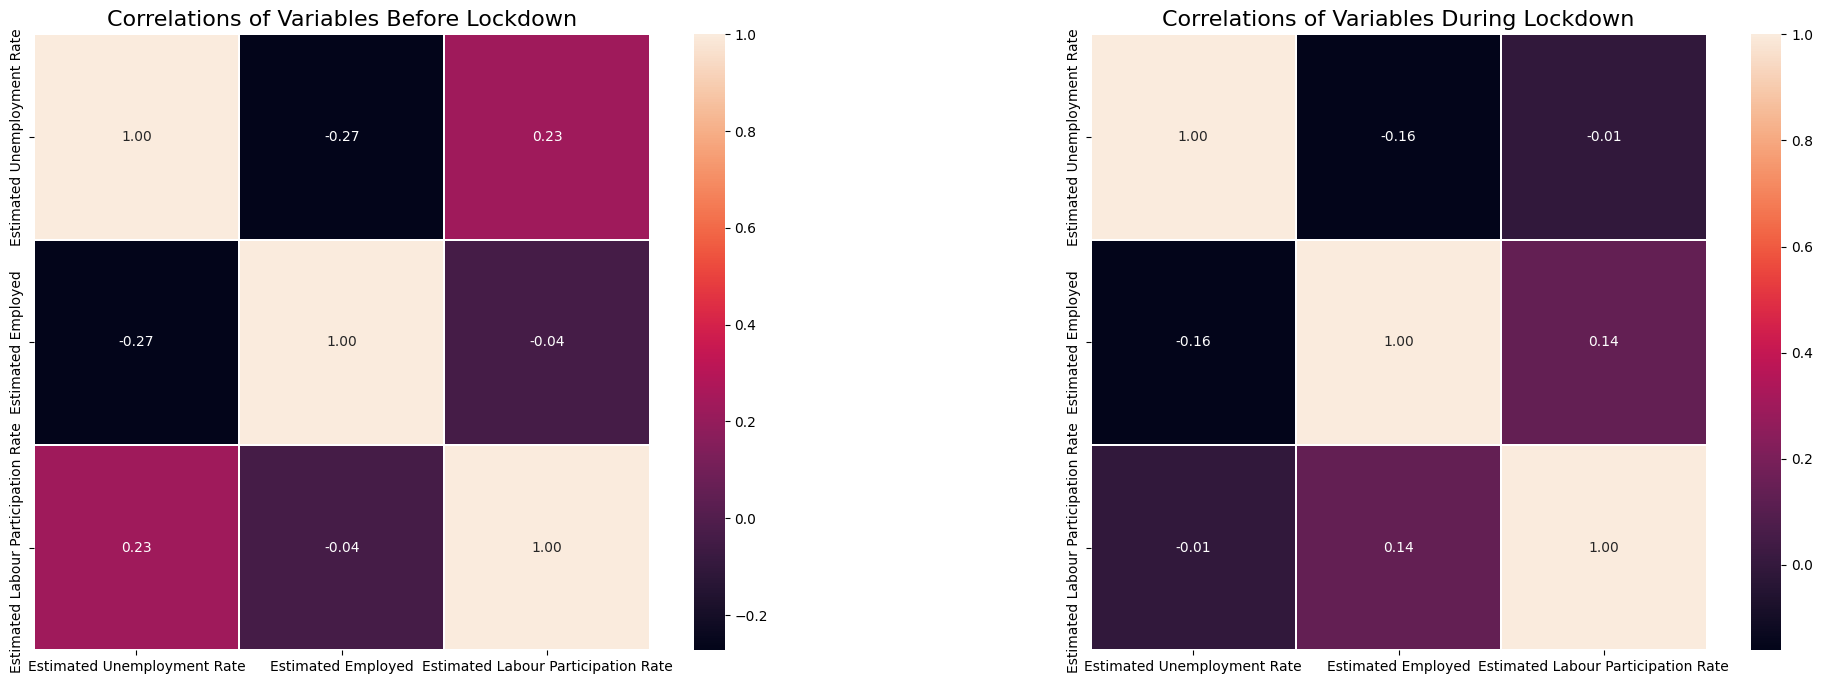

In [197]:
# Chart - 6 Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()

From the above heatmaps we got to know that, Estimated Unemployment Rate and Estimated Employed are negatively highly correlated for both, before and during lockdown time.

# Conclusion

## Unemployment Analysis: Economic Impact of Covid-19 Pandemic

## Project Summary
This comprehensive data science investigation focused on analyzing unemployment patterns across India, examining how the Covid-19 pandemic fundamentally altered the employment landscape. Through systematic exploratory data analysis, we extracted meaningful insights into regional employment dynamics and economic disruption patterns.

## Primary Findings

### 1. Pandemic-Driven Employment Crisis
The research documented a substantial escalation in unemployment rates following the implementation of Covid-19 restrictions, revealing the extensive economic disruption caused by pandemic control measures across the Indian labor market.

### 2. Regional Vulnerability Assessment
State-level analysis identified significant geographical variations in unemployment impact. During lockdown periods, Puducherry and Jharkhand experienced the most severe unemployment challenges, contrasting with pre-pandemic conditions where Haryana and Tripura dominated unemployment statistics.

### 3. Employment Pattern Transformation
The lockdown period triggered notable shifts in regional unemployment leadership. Pre-lockdown unemployment was concentrated in Tripura, Haryana, and Himachal Pradesh, while pandemic restrictions elevated Puducherry, Jharkhand, and Bihar to the highest unemployment rates.

### 4. Workforce Stability Analysis
Large population states including Uttar Pradesh, Maharashtra, and West Bengal demonstrated remarkable consistency in employment numbers, maintaining their positions as primary employment centers throughout both pre-lockdown and lockdown phases despite overall economic turbulence.

### 5. Labor Force Participation Patterns
The study revealed varying levels of labor market engagement across regions. Before the pandemic, Telangana, Tripura, Meghalaya, and Assam showed superior labor participation rates, while during restrictions, Meghalaya, Telangana, Tripura, and Andhra Pradesh maintained the strongest workforce participation levels.

### 6. Employment Correlation Insights
Statistical analysis confirmed a strong inverse relationship between unemployment rates and employed workforce metrics, validating expected economic relationships across both temporal periods and providing quantitative evidence of labor market dynamics.

## Research Implications
This analysis exemplifies the capability of data-driven methodologies to illuminate complex economic phenomena during crisis periods. The research outcomes provide essential evidence for policy development, economic planning, and crisis management strategies. The findings emphasize the critical role of analytical approaches in understanding regional economic vulnerabilities and supporting evidence-based decision-making for future pandemic preparedness and economic resilience planning.